## Task 3.2 Fire_evac

In [1]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from model import VAE
from utils import * 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

""" This script is used to train and test the VAE on the fire_evac dataset. 
(Bonus: You can simulate trajectories with Vadere, for bonus points.) 
Not included in automated tests, as it's open-ended.
"""

" This script is used to train and test the VAE on the fire_evac dataset. \n(Bonus: You can simulate trajectories with Vadere, for bonus points.) \nNot included in automated tests, as it's open-ended.\n"

In [2]:
# TODO: Download the FireEvac dataset
train_data_numpy = np.load('../../data/FireEvac_train_set.npy')
test_data_numpy = np.load('../../data/FireEvac_test_set.npy')
train_data_n = 2 * (train_data_numpy - train_data_numpy.min(axis=0)) / (train_data_numpy.max(axis=0) - train_data_numpy.min(axis=0)) - 1
test_data_n = 2 * (test_data_numpy - test_data_numpy.min(axis=0)) / (test_data_numpy.max(axis=0) - test_data_numpy.min(axis=0)) - 1
print(train_data_n)
train_data = torch.tensor(train_data_n, dtype=torch.float32)
test_data = torch.tensor(test_data_n, dtype=torch.float32)

from torch.utils.data import TensorDataset
train_loader = DataLoader(TensorDataset(train_data), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(test_data), batch_size=64, shuffle=False)
batch_size = 64


[[-0.09570027  0.11619377]
 [-0.21567698  0.41994407]
 [ 0.29992119  0.56058169]
 ...
 [-0.46015087 -0.17097493]
 [-0.9564204  -0.13276903]
 [-0.66162914 -0.24624472]]


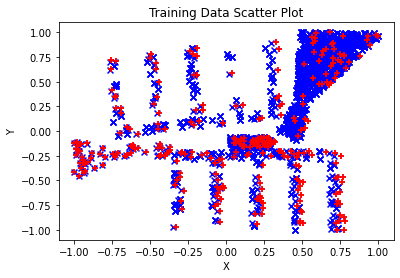

In [4]:
# TODO: Make a scatter plot to visualise it.

plt.scatter(train_data[:, 0], train_data[:, 1], marker='x', s=35, color='blue', label='Training Data')
plt.scatter(test_data[:, 0], test_data[:, 1], marker='+', s=35, color='red', label='Test Data')
plt.title('Training Data Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
# TODO: Train a VAE on the FireEvac data
num_epochs = 300
input_dim = 2
latent_dim = 2
hidden_dim = 64
learning_rate = 0.0005
vae = instantiate_vae(input_dim, hidden_dim, latent_dim, device).to(device)
optimizer = optim.Adam(vae.parameters(), lr=learning_rate)

# train_losses, test_losses = training_loop(vae, optimizer, train_loader, test_loader, num_epochs, plots_at_epochs, device)
# plot_loss(train_losses, test_losses)
train_losses = []
test_losses = []
reconstructed = []
for epoch in range(num_epochs):
    vae.train()
    total_train_loss = 0
    for data in train_loader:

        optimizer.zero_grad()
        data = data[0].to(device)
        recon_x, mu, logvar = vae(data)
        loss = elbo_loss(data*100, recon_x*100, mu, logvar)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
    total_train_loss /= len(train_loader.dataset)
    train_losses.append(total_train_loss)

    vae.eval()

    total_test_loss = 0
    with torch.no_grad():
        for data in test_loader:
            data = data[0].to(device)
            recon_x, mu, logvar = vae(data)
            #loss = mse_loss(data, recon_x)
            loss = elbo_loss(data*100, recon_x*100, mu, logvar)
            total_test_loss += loss.item()
    total_test_loss /= len(test_loader.dataset)
    train_losses.append(total_test_loss)
    print(f'Epoch {epoch + 1}, Train Loss: {total_train_loss:.4f}, Test Loss: {total_test_loss:.4f}')


Epoch 1, Train Loss: 73.3706, Test Loss: 118.7593
Epoch 2, Train Loss: 67.5306, Test Loss: 120.1062
Epoch 3, Train Loss: 62.7121, Test Loss: 127.2369
Epoch 4, Train Loss: 59.9325, Test Loss: 134.7336
Epoch 5, Train Loss: 59.0690, Test Loss: 138.4229
Epoch 6, Train Loss: 58.9472, Test Loss: 141.2196
Epoch 7, Train Loss: 58.7773, Test Loss: 140.0920
Epoch 8, Train Loss: 58.9070, Test Loss: 141.1035
Epoch 9, Train Loss: 58.7035, Test Loss: 141.4645
Epoch 10, Train Loss: 58.5692, Test Loss: 141.6200
Epoch 11, Train Loss: 58.6166, Test Loss: 141.6911
Epoch 12, Train Loss: 58.5405, Test Loss: 142.1305
Epoch 13, Train Loss: 58.3644, Test Loss: 142.5998
Epoch 14, Train Loss: 58.3783, Test Loss: 142.0759
Epoch 15, Train Loss: 58.3063, Test Loss: 142.3776
Epoch 16, Train Loss: 58.6544, Test Loss: 140.0168
Epoch 17, Train Loss: 58.3781, Test Loss: 141.1496
Epoch 18, Train Loss: 58.2559, Test Loss: 141.4088
Epoch 19, Train Loss: 58.1381, Test Loss: 141.1953
Epoch 20, Train Loss: 58.2143, Test Loss

Epoch 164, Train Loss: 9.6184, Test Loss: 25.2187
Epoch 165, Train Loss: 9.6228, Test Loss: 25.0612
Epoch 166, Train Loss: 9.5550, Test Loss: 25.0430
Epoch 167, Train Loss: 9.5784, Test Loss: 25.0298
Epoch 168, Train Loss: 9.5347, Test Loss: 25.1860
Epoch 169, Train Loss: 9.5126, Test Loss: 24.8625
Epoch 170, Train Loss: 9.5217, Test Loss: 24.9059
Epoch 171, Train Loss: 9.4529, Test Loss: 24.8066
Epoch 172, Train Loss: 9.4699, Test Loss: 25.1120
Epoch 173, Train Loss: 9.4542, Test Loss: 25.1320
Epoch 174, Train Loss: 9.4562, Test Loss: 24.9577
Epoch 175, Train Loss: 9.4767, Test Loss: 24.9095
Epoch 176, Train Loss: 9.4268, Test Loss: 24.9094
Epoch 177, Train Loss: 9.3895, Test Loss: 24.9980
Epoch 178, Train Loss: 9.4182, Test Loss: 24.8760
Epoch 179, Train Loss: 9.3954, Test Loss: 24.8472
Epoch 180, Train Loss: 9.3478, Test Loss: 24.5916
Epoch 181, Train Loss: 9.3544, Test Loss: 24.7713
Epoch 182, Train Loss: 9.3661, Test Loss: 24.7411
Epoch 183, Train Loss: 9.3051, Test Loss: 24.7864


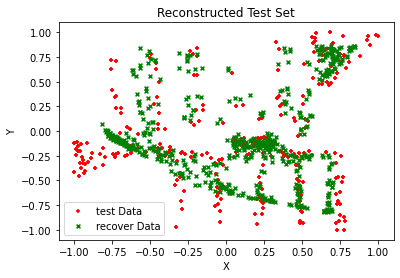

In [9]:
# TODO: Make a scatter plot of the reconstructed test set

vae.eval()

with torch.no_grad():
    for data in test_loader:
        data = data[0].to(device)
        recon_x, _, _ = vae(data)
        reconstructed.append(recon_x.cpu().detach().numpy())

reconstructed = np.vstack(reconstructed)

plt.scatter(test_data[:, 0], test_data[:, 1], marker='+', s=15, color='red', label='test Data')
plt.scatter(reconstructed[:, 0], reconstructed[:, 1], marker='x', s=15, color='green', label='recover Data')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Reconstructed Test Set')
plt.show()

[[-0.59818196  0.27034366]
 [-0.65559065  0.09543487]
 [-0.92170984  0.2975844 ]
 ...
 [-0.00182029  0.92945695]
 [-0.6301204  -0.07486276]
 [ 0.97666144  0.99834204]]


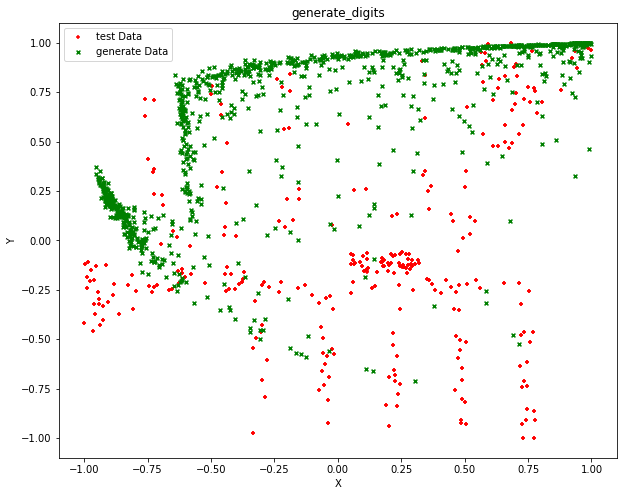

In [10]:
# TODO: Make a scatter plot of 1000 generated samples.
vae.eval()
mean = [-0.5, 1]
covariance_matrix = [[1, 0.5], [0.5, 1]]
data_points = np.random.multivariate_normal(mean, covariance_matrix, 1000)
with torch.no_grad():
    z = torch.tensor(data_points).to(vae.device)
    generate_data = vae(z)
    generate_data = generate_data[0].cpu().detach().numpy()
    print(generate_data)
plt.figure(figsize=(10, 8))
plt.scatter(test_data[:, 0], test_data[:, 1], marker='+', s=15, color='red', label='test Data')
plt.scatter(generate_data[:, 0], generate_data[:, 1], marker='x', s=15, color='green', label='generate Data')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('generate_digits')
plt.show()

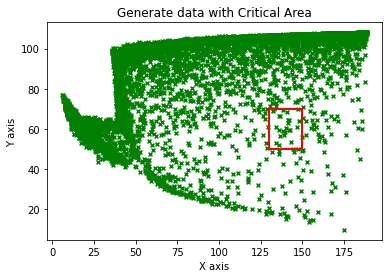

Estimated number of people in the critical area: 25


In [22]:
# TODO: Generate data to estimate the critical number of people for the MI building
critical_area = ((130, 70), (150, 50))
(x1, y1), (x2, y2) = critical_area

def in_critical_area(x, y, area):
    (x1, y1), (x2, y2) = area
    return x1 <= x <= x2 and y2 <= y <= y1

critical_count = 0
vae.eval()
mean = [-0.5, 1]
covariance_matrix = [[1, 0.5], [0.5, 1]]
data_points = np.random.multivariate_normal(mean, covariance_matrix, 10000)
with torch.no_grad():
    z = torch.tensor(data_points).to(vae.device)
    critical_data = vae(z)
    critical_data = critical_data[0].cpu().detach().numpy()
    critical_data_min = train_data_numpy.min(axis=0)
    critical_data_max = train_data_numpy.max(axis=0)
    critical_data_original = (critical_data + 1) / 2 * (critical_data_max - critical_data_min) + critical_data_min
    for x, y in critical_data_original:
        if in_critical_area(x, y, critical_area):
            critical_count += 1

import matplotlib.patches as patches
fig, ax = plt.subplots()
ax.scatter(critical_data_original[:, 0], critical_data_original[:, 1], marker='x', s=15, color='green', label='generate Data')

width = x2 - x1
height = y1 - y2
rect = patches.Rectangle((x1, y2), width, height, linewidth=2, edgecolor='r', facecolor='none')

ax.add_patch(rect)

ax.set_title("Generate data with Critical Area")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")

# 显示图表
plt.show()
print(f'Estimated number of people in the critical area: {critical_count}')